In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr


# inspired by
# https://nbviewer.jupyter.org/github/aaronspring/xarray_dask_talk_unihh/blob/master/notebook/xarray_dask.ipynb


# with path on mistral
fssp='/work/ik1017/CMIP6/data/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-LR/'

fssp='/Users/reginakwee/Documents/DKRZ/ecas/data_esgf/pr_Amon_MPI-ESM1-2-LR_ssp370_r1i1p1f1_gn_207501-209412.nc'
fpiC='/Users/reginakwee/Documents/DKRZ/ecas/data_esgf/pr_Amon_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn_269001-270912.nc'
fpiC='/Users/reginakwee/Documents/DKRZ/ecas/data_esgf/pr_Amon_MPI-ESM1'
fhis='/Users/reginakwee/Documents/DKRZ/ecas/data_esgf/pr_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_195001-196912.nc'


ds_ssp  = xr.open_dataset(fssp)
#dspiC = xr.open_dataset(fpiC)
ds_his = xr.open_dataset(fhis)

# time ranges
# historical: 10j von 1950 bis 1959
# piControl : 10j von 2700 bis 2079--!--skip for now: corrupted data
# scenari370: 10j von 2075 bis 2094

type(ds_his['pr'])

xarray.core.dataarray.DataArray

In [4]:
ds_ssp.pr

<xarray.DataArray 'pr' (time: 240, lat: 96, lon: 192)>
[4423680 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2075-01-16T12:00:00 ... 2094-12-16T12:00:00
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    original_name:  pr
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-04T13:22:59Z altered by CMOR: replaced missing va...

In [162]:
ds_ssp.pr.sel(time='2075-01')

<xarray.DataArray 'pr' (time: 1, lat: 96, lon: 192)>
array([[[1.246895e-06, 1.247827e-06, ..., 1.232620e-06, 1.244043e-06],
        [2.818240e-06, 2.948509e-06, ..., 3.115769e-06, 2.893794e-06],
        ...,
        [5.923997e-06, 5.866779e-06, ..., 5.846974e-06, 5.721406e-06],
        [3.964553e-06, 4.013709e-06, ..., 3.760593e-06, 3.884939e-06]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2075-01-16T12:00:00
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    original_name:  pr
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-04T13:22:59Z altered by CMOR: replaced missing va...

In [5]:

lons = ds_ssp['lon']
lats = ds_ssp['lat'] #x

#lons

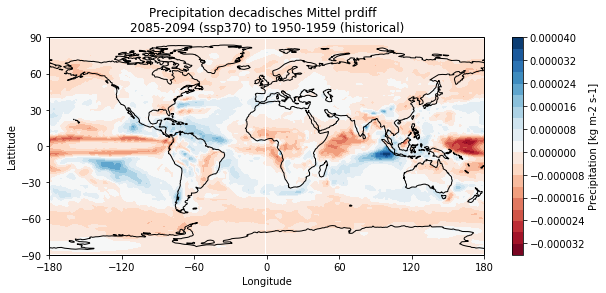

In [178]:
# plot


# chose one of the ds
lons = ds_ssp['lon']
lats = ds_ssp['lat'] #x


fig = plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# so mittelt man ueber die ersten 10 Jahre
pr10=ds_his['pr'].isel(time=slice(0,10*12)).mean('time')

# so berechnet man den MW der 10 Jahre rueckwaerts von 240 Zeitschritten
pr10end=ds_ssp['pr'].isel(time=slice(240-10*12,240)).mean('time')

# difference 
prdiff = pr10 - pr10end

# argumente: countourf(x, y, z, zbins, 
p = plt.contourf(lons, lats, prdiff, 20,
            # transform of the projection, color map = red/blue scale for color blinds
               transform=ccrs.PlateCarree(), cmap='RdBu')


# -- label
ax.set_xlabel('Longitude')
ax.set_ylabel('Lattitude')

# -- per Hand
ax.set_xticks([-180,-120,-60,0,60,120,180])
ax.set_yticks([-90,-60,-30,0,30,60,90])

# -- statt der letzten 4 code zeilen, sind eine hübschere Alternative


# draw colorbar
c = plt.colorbar(p)

#print(ds_his['pr'].attrs['units'])

# for plot title
plottitle = ds_his['pr'].attrs['long_name']
c.ax.set_ylabel(plottitle + ' ['+ ds_his['pr'].attrs['units'] +']')

# string datetime
strdt =' \n2085-2094 (ssp370) to 1950-1959 (historical)'  
pname = plottitle + ' decadisches Mittel prdiff '+ strdt 

plt.title(pname)

# save before show()
pname='/Users/reginakwee/c.png'
plt.savefig(pname)
plt.show()

<Figure size 432x288 with 0 Axes>

In [6]:
#import matplotlib.ticker as mticker
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
#gl.xlabels_top = False
#gl.ylabels_left = True
#gl.ylabels_right = False
#gl.xlines = False
#gl.ylines = False
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER

#ax.text(-0.07, 0.55, 'latitude', va='bottom', ha='center',
#        rotation='vertical', rotation_mode='anchor',
#        transform=ax.transAxes)
#ax.text(0.5, -0.2, 'longitude', va='bottom', ha='center',
#        rotation='horizontal', rotation_mode='anchor',
#        transform=ax.transAxes)